# Доверительные интервалы на основе bootstrap

In [38]:
import numpy as np
import pandas as pd

In [39]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Загрузка данных

### Время ремонта телекоммуникаций

Verizon — основная региональная телекоммуникационная компания (Incumbent Local Exchange Carrier, ILEC) в западной 
части США. В связи с этим данная компания обязана предоставлять сервис ремонта телекоммуникационного оборудования 
не только для своих клиентов, но и для клиентов других локальных телекоммуникационых компаний (Competing Local Exchange Carriers, CLEC). При этом в случаях, когда время ремонта оборудования для клиентов других компаний существенно выше, чем для собственных, Verizon может быть оштрафована. 

In [40]:
data = pd.read_csv('verizon.txt', sep='\t')
data.shape

(1687, 2)

In [41]:
data.head()

,Time,Group
0,17.50,ILEC
1,2.40,ILEC
2,0.00,ILEC
3,0.65,ILEC
4,22.23,ILEC


In [42]:
data.Group.value_counts()

ILEC    1664
CLEC      23
Name: Group, dtype: int64

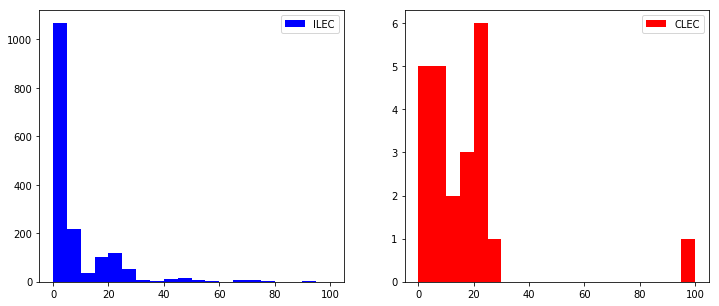

In [54]:
pylab.figure(figsize(12, 5))
pylab.subplot(1,2,1)
pylab.hist(data[data.Group == 'ILEC'].Time, bins = 20, color = 'b', range = (0, 100), label = 'ILEC')
pylab.legend()

pylab.subplot(1,2,2)
pylab.hist(data[data.Group == 'CLEC'].Time, bins = 20, color = 'r', range = (0, 100), label = 'CLEC')
pylab.legend()

pylab.show()

## Bootstrap

In [57]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

In [58]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

### Интервальная оценка медианы

In [59]:
ilec_time = data[data.Group == 'ILEC'].Time.values
clec_time = data[data.Group == 'CLEC'].Time.values

In [73]:
clec_time

array([2.662e+01, 8.600e+00, 0.000e+00, 2.115e+01, 8.330e+00, 2.028e+01,
       9.632e+01, 1.797e+01, 3.420e+00, 7.000e-02, 2.438e+01, 1.988e+01,
       1.433e+01, 5.450e+00, 5.400e+00, 2.680e+00, 0.000e+00, 2.420e+01,
       2.213e+01, 1.857e+01, 2.000e+01, 1.413e+01, 5.800e+00])

In [66]:
np.random.seed(0)

ilec_median_scores = list(map(np.median, get_bootstrap_samples(ilec_time, 1000)))
clec_median_scores = list(map(np.median, get_bootstrap_samples(clec_time, 1000)))

print("95% confidence interval for the ILEC median repair time:",  stat_intervals(ilec_median_scores, 0.05))
print("95% confidence interval for the CLEC median repair time:",  stat_intervals(clec_median_scores, 0.05))

95% confidence interval for the ILEC median repair time: [3.18    3.82525]
95% confidence interval for the CLEC median repair time: [ 5.79125 20.     ]


### Точечная оценка разности медиан

In [67]:
print("difference between medians:", np.median(clec_time) - np.median(ilec_time))

difference between medians: 10.74


### Интервальная оценка разности медиан

In [68]:
delta_median_scores = list(map(lambda x: x[1] - x[0], zip(ilec_median_scores, clec_median_scores)))

In [69]:
print("95% confidence interval for the difference between medians",  stat_intervals(delta_median_scores, 0.05))

95% confidence interval for the difference between medians [ 2.04975 16.63   ]


# Итоговое задание

В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [19]:
import numpy as np
import pandas as pd

import scipy
from statsmodels.stats.weightstats import *
from statsmodels.stats.proportion import proportion_confint

In [32]:
conf_interval_aspirin = proportion_confint(104, 
                                            11037,
                                            method = 'wilson')
conf_interval_placebo = proportion_confint(189, 
                                            11034 ,
                                            method = 'wilson')

In [26]:
print('interval for aspirin {}'.format(list(conf_interval_aspirin)))
print('interval for placebo {}'.format(list(conf_interval_placebo)))

interval for aspirin [0.007783358288966079, 0.011403717226138864]
interval for placebo [0.014870523663224692, 0.01972332878929014]


In [113]:
(104/11037 - 189/11034)

-0.0077060239760047815

In [84]:
((11037 - 104)/11037 - (11034 - 189)/11034 ) * 100

0.7706023976004839

In [133]:
0.0174/(104/(11037-104))

1.829175

0.5459770114942529

In [60]:
np.random.seed(0)

Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
установите random seed=0;
сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [74]:
aspirin = np.array([1] * 104 + [0] * 11037)
placebo = np.array([1] * 189 + [0] * 11034)

In [122]:
np.random.seed(0)

aspirin = np.array([1] * 104 + [0] * 11037)
placebo = np.array([1] * 189 + [0] * 11034)

aspirin_scores = list(map(lambda x: sum(x)/(len(x) - sum(x)), get_bootstrap_samples(aspirin, 1000)))
placebo_scores = list(map(lambda x: sum(x)/(len(x) - sum(x)), get_bootstrap_samples(placebo, 1000)))

print("95% confidence interval for the aspirin_scores:",  stat_intervals(aspirin_scores, 0.05))
print("95% confidence interval for the placebo_scores:",  stat_intervals(placebo_scores, 0.05))

95% confidence interval for the aspirin_scores: [0.007597   0.01125533]
95% confidence interval for the placebo_scores: [0.01473779 0.01962388]


In [131]:
delta_scores = list(map(lambda x: x[1]/x[0], zip(aspirin_scores, placebo_scores)))

In [132]:
print("95% confidence interval for the relation between scores",  stat_intervals(delta_scores, 0.05))

95% confidence interval for the relation between scores [1.43555491 2.34742089]


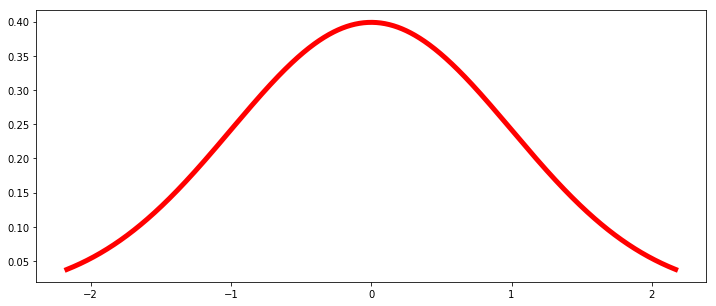

In [102]:
fig, ax = pyplot.subplots(1, 1)
x = np.linspace(scipy.stats.norm.ppf(0.015), scipy.stats.norm.ppf(0.985), 1000)
ax.plot(x, scipy.stats.norm.pdf(x),'r-', lw=5, alpha=1, label='norm pdf')

In [104]:
x[-1]

2.17009037758456

In [105]:
x[0]
2.1701

-2.1700903775845606

In [129]:
def proportions_confint_diff_ind(sample1, sample2, alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [130]:
print("confidence interval: {}".format(list(proportions_confint_diff_ind(placebo, aspirin))))

confidence interval: [0.004529658147510415, 0.010481397557710704]
